# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #numpy random function, using a uniform distribution. We have lower and upper bounds (inclusive), and 
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#print(tuple(lat_lngs)) ###my addition

#Note: the zip function is a built-in standard function. It takes multiple iterables/containers as parameters. An iterable is an object you can step through/iterate over. Zip() returns a zip object - ite takes iterable elements as input (in this case, a lat/long pair) and returns an iterator

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#So first, we iterate through each lat/long pair. 
# Print the city count to confirm sufficient count
len(cities)


#could also make a dictionary, to get country codes as well, and then tabulate the abundance of countries as well as their distribution.

630

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


#CREATE EMPTY LISTS FOR KEYS IN DF (JSON DATA WILL BE STORED IN HERE)

city_name = []
country = []
lat = []
long = []
date = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

#INITIATE COUNT FOR LOOP

count = 1

print('***   '*8)

#LOOP THROUGH THE LIST OF CITIES, PERFORM API REQ ON EACH, SAVE SELECTED DATA

for city in cities:
    
    try: 
        req_test = requests.get(base_url + f'&q={city}').json()
        city_name.append(req_test['name'])
        country.append(req_test['sys']['country'])
        lat.append(req_test['coord']['lat'])
        long.append(req_test['coord']['lon'])
        date.append(req_test['dt'])
        max_temp.append(req_test['main']['temp_max'])
        humidity.append(req_test['main']['humidity'])
        cloudiness.append(req_test['clouds']['all'])
        wind_speed.append(req_test['wind']['speed'])
        
        print(f'Processing record {count} : {city}')
        
        count +=1
        
    except:
        
        print(f'No data for city {city}. Moving on.')
        
        continue

print('***   '*8)
print(f'All Finished.')
print(f'Prepare for munging!')
print('***   '*8)

***   ***   ***   ***   ***   
Processing record 1 : hilo
No data for city louisbourg. Moving on.
Processing record 2 : tiksi
Processing record 3 : jamestown
Processing record 4 : bluff
No data for city barentsburg. Moving on.
Processing record 5 : saskylakh
Processing record 6 : vardo
Processing record 7 : fortuna
Processing record 8 : clemencia
Processing record 9 : dikson
Processing record 10 : hobart
Processing record 11 : eau claire
Processing record 12 : gannan
Processing record 13 : port elizabeth
Processing record 14 : pisco
Processing record 15 : bandarbeyla
Processing record 16 : mataura
Processing record 17 : turukhansk
Processing record 18 : namibe
Processing record 19 : atakpame
Processing record 20 : bredasdorp
Processing record 21 : velyka oleksandrivka
Processing record 22 : santa maria
No data for city vaitupu. Moving on.
No data for city illoqqortoormiut. Moving on.
Processing record 23 : busselton
Processing record 24 : bhatkal
Processing record 25 : ushuaia
Processi

Processing record 228 : roald
Processing record 229 : havre-saint-pierre
Processing record 230 : tessalit
Processing record 231 : hasaki
Processing record 232 : dingle
Processing record 233 : victoria
Processing record 234 : keti bandar
Processing record 235 : caravelas
Processing record 236 : ixtapa
Processing record 237 : charters towers
Processing record 238 : nikolskoye
Processing record 239 : kamenka
Processing record 240 : sikonge
Processing record 241 : kismayo
Processing record 242 : goderich
Processing record 243 : ribeira grande
No data for city mentok. Moving on.
Processing record 244 : severo-kurilsk
Processing record 245 : novyy urgal
Processing record 246 : takoradi
Processing record 247 : chokurdakh
Processing record 248 : laguna
Processing record 249 : makakilo city
Processing record 250 : rantepao
Processing record 251 : samarai
Processing record 252 : kaseda
Processing record 253 : lasa
Processing record 254 : dunedin
Processing record 255 : jalu
Processing record 256

Processing record 456 : la romana
Processing record 457 : poum
Processing record 458 : baghdad
Processing record 459 : changqing
Processing record 460 : abengourou
Processing record 461 : eyrarbakki
No data for city takob. Moving on.
Processing record 462 : nuuk
Processing record 463 : atasu
Processing record 464 : mbini
No data for city labutta. Moving on.
Processing record 465 : mwanza
Processing record 466 : kourou
Processing record 467 : husavik
Processing record 468 : tommot
Processing record 469 : ternate
Processing record 470 : morgan city
Processing record 471 : teluknaga
Processing record 472 : manta
No data for city saleaula. Moving on.
Processing record 473 : carballo
Processing record 474 : nanortalik
Processing record 475 : kodinsk
Processing record 476 : atar
Processing record 477 : labuhan
Processing record 478 : alice springs
No data for city zhanatas. Moving on.
Processing record 479 : mwingi
Processing record 480 : severo-yeniseyskiy
Processing record 481 : pilar
Proc

### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [4]:
#CONSTRUCTING DICTIONARY FOR THE DATA FRAME
JSON_dict = {
    'City': city_name,
    'Country': country,
    'Latitude': lat,
    'Longitude': long,
    'Date': date,
    'MaxTemp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'WindSpeed': wind_speed
}

#CREATING A PANDAS DATAFRAME FROM JSON DATA
complete_weather = pd.DataFrame(JSON_dict)

#DISPLAY COUNT OF RECORDS
complete_weather.count()

City          582
Country       582
Latitude      582
Longitude     582
Date          582
MaxTemp       582
Humidity      582
Cloudiness    582
WindSpeed     582
dtype: int64

In [5]:
#SAVE DATA FRAME TO CSV
complete_weather.to_csv('complete_weather.csv')

#DISPLAY DATA FRAME HEAD
complete_weather.head()

,City,Country,Latitude,Longitude,Date,MaxTemp,Humidity,Cloudiness,WindSpeed
0,Hilo,US,19.7297,-155.0900,1618344143,77.00,57,1,6.91
1,Tiksi,RU,71.6872,128.8694,1618344143,11.39,79,93,11.12
2,Jamestown,US,42.0970,-79.2353,1618343904,60.80,41,1,5.75
3,Bluff,NZ,-46.6000,168.3333,1618344144,51.01,96,100,8.01
4,Saskylakh,RU,71.9167,114.0833,1618344144,5.00,99,97,4.52


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

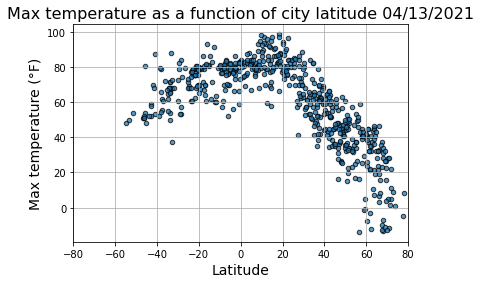

In [6]:
#TODAY'S DATE FOR TITLES
import datetime
today = datetime.date.today().strftime('%m/%d/%Y')

plt.scatter(complete_weather['Latitude'], complete_weather['MaxTemp'], marker='o', s=20, alpha = .75, edgecolors = 'k')
plt.xlim(-80,80)
plt.title(f'Max temperature as a function of city latitude {today}', fontsize = 16)
plt.ylabel('Max temperature (°F)', fontsize = 14)
plt.xlabel('Latitude', fontsize = 14)
plt.grid(True)

plt.savefig('Max temperature as a function of city latitude.png')
plt.show()

#### Latitude vs. Humidity Plot

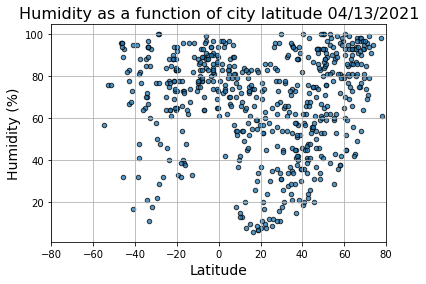

In [7]:
plt.scatter(complete_weather['Latitude'], complete_weather['Humidity'], marker='o', s=20, alpha = .75, edgecolors = 'k')
plt.xlim(-80,80)
plt.title(f'Humidity as a function of city latitude {today}', fontsize = 16)
plt.ylabel('Humidity (%)', fontsize = 14)
plt.xlabel('Latitude', fontsize = 14)
plt.grid(True)

plt.savefig('Humidity as a function of city latitude.png')
plt.show()

#### Latitude vs. Cloudiness Plot

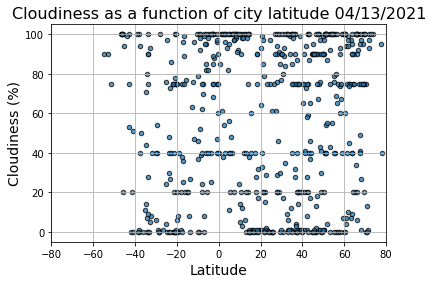

In [8]:
plt.scatter(complete_weather['Latitude'], complete_weather['Cloudiness'], marker='o', s=20, alpha = .75, edgecolors = 'k')
plt.xlim(-80,80)
plt.title(f'Cloudiness as a function of city latitude {today}', fontsize = 16)
plt.ylabel('Cloudiness (%)', fontsize = 14)
plt.xlabel('Latitude', fontsize = 14)
plt.grid(True)

plt.savefig('Cloudiness as a function of city latitude.png')
plt.show()

#### Latitude vs. Wind Speed Plot

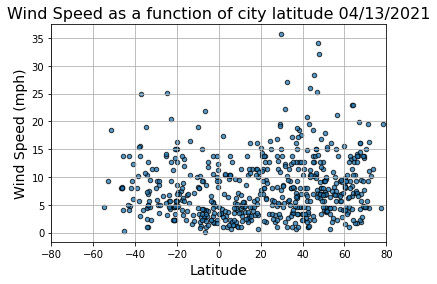

In [9]:
plt.scatter(complete_weather['Latitude'], complete_weather['WindSpeed'], marker='o', s=20, alpha = .75, edgecolors = 'k')
plt.xlim(-80,80)
plt.title(f'Wind Speed as a function of city latitude {today}', fontsize = 16)
plt.ylabel('Wind Speed (mph)', fontsize = 14)
plt.xlabel('Latitude', fontsize = 14)
plt.grid(True)

plt.savefig('Wind Speed as a function of city latitude.png')
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

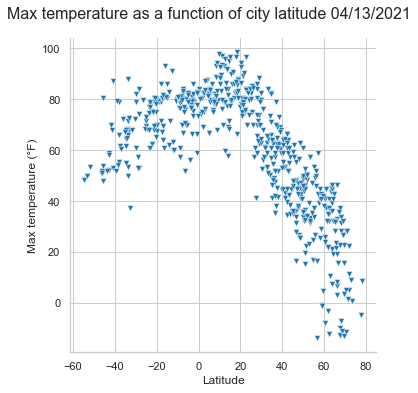

<Figure size 432x288 with 0 Axes>

In [10]:
#SETTING DEPENDENCIES AND PREFERENCES FOR SEABORN
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

#SCATTERPLOT FOR LATITUDE/TEMPERATURE

MAX_TEMP = sns.relplot(x = 'Latitude', y = 'MaxTemp', data = complete_weather, kind = 'scatter', marker = 'v')
MAX_TEMP.fig.suptitle(f'Max temperature as a function of city latitude {today}', fontsize = 16, y = 1.05)
MAX_TEMP.set(xlabel = 'Latitude', ylabel = 'Max temperature (°F)')
plt.show()
plt.savefig('MAX_TEMP.png')

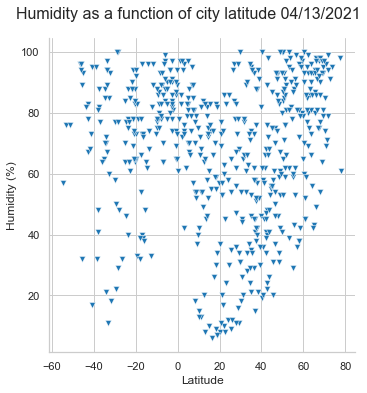

<Figure size 432x288 with 0 Axes>

In [15]:
#SEABORN SCATTERPLOT FOR LATITUDE/HUMIDITY

HUMIDITY = sns.relplot(x = 'Latitude', y = 'Humidity', data = complete_weather, kind = 'scatter', marker = 'v')
HUMIDITY.fig.suptitle(f'Humidity as a function of city latitude {today}', fontsize = 16, y = 1.05)
HUMIDITY.set(xlabel = 'Latitude', ylabel = 'Humidity (%)')
plt.show()
plt.savefig('HUMIDITY.png')

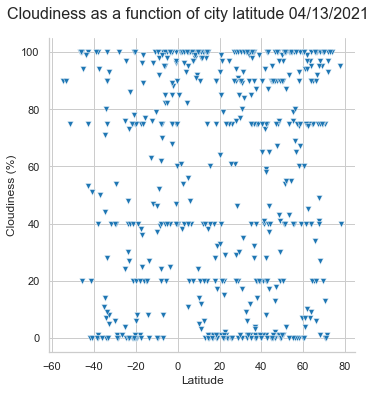

<Figure size 432x288 with 0 Axes>

In [12]:
#SEABORN SCATTERPLOT FOR LATITUDE/CLOUDINESS

CLOUDINESS = sns.relplot(x = 'Latitude', y = 'Cloudiness', data = complete_weather, kind = 'scatter', marker = 'v')
CLOUDINESS.fig.suptitle(f'Cloudiness as a function of city latitude {today}', fontsize = 16, y = 1.05)
CLOUDINESS.set(xlabel = 'Latitude', ylabel = 'Cloudiness (%)')
plt.show()
plt.savefig('CLOUDINESS.png')

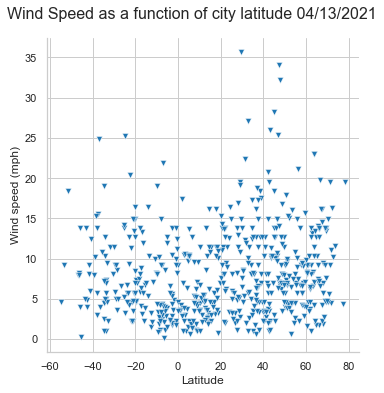

<Figure size 432x288 with 0 Axes>

In [13]:
#SEABORN SCATTERPLOT FOR LATITUDE/WIND SPEED

WIND_SPEED = sns.relplot(x = 'Latitude', y='WindSpeed', data = complete_weather, kind = 'scatter', marker = 'v')
WIND_SPEED.fig.suptitle(f'Wind Speed as a function of city latitude {today}', fontsize = 16, y = 1.05)
WIND_SPEED.set(xlabel = 'Latitude', ylabel = 'Wind speed (mph)')
plt.show()
plt.savefig('WIND_SPEED.png')

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

The maximum daily temperature increases as the latitude decreases: it gets warmer as you approach the equator. However, the degree of warming is not symmetrical. The temperatures decline faster as you move towards the North Pole; similar latitudes in the Southern Hemisphere are warmer. 
    
Humidity is greatest within 10 degrees of the equator (it stays above 60%); lower humidities occur between 20-40 degrees. This makes sense, as air rising from the equator releases precipitation; air masses move poleward, warm, sink, and draws moisture from the land, creating arid zones between 20-40 degrees. 
    
There is no clear relationship between cloudiness, or wind speed, and latitude. 

Note: I rescaled the latitude axis to range from -80 to 80. This allows us to see that the Northern Hemisphere is more heavily sampled. This sampling is due to the unequal distribution of land masses on the globe (more land mass  occurs in the Northern Hemsiphere above 60 degrees). Generalizations about the relationships between latitude and weather characteristics have to be interpreted with this in mind.


### Displaying geospatial distribution of sampled cities

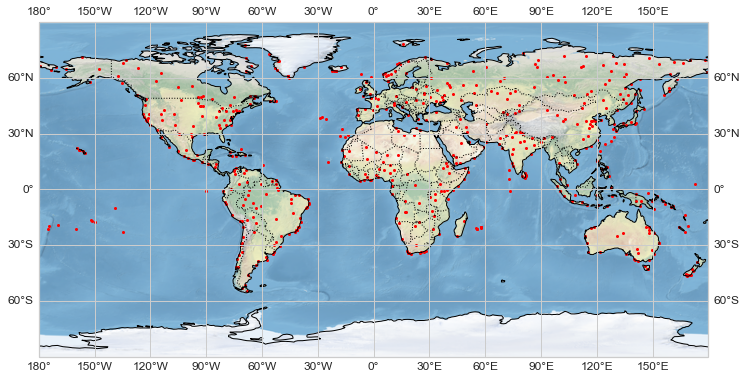

In [34]:
#I THOUGHT THIS WOULD BE A FUN ADDITION.

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#INITIALIZE THE MAP
fig = plt.figure(figsize=(12,9))

#SET THE PROJECTION TO PLATECARREE AND ADD FEATURES

ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.set_global()
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle = 'dotted')
ax.gridlines(draw_labels = True, xlocs = np.arange(-180,180,30))

#PLOT THE CITY COORDINATE DATA ON TOP OF MAP

plt.scatter(complete_weather['Longitude'], complete_weather['Latitude'], color = 'red', s = 4, alpha = 1)

#HOWEVER, IT LOOKS LIKE SOME OF THE CITIES ARE IN THE MIDDLE OF THE OCEAN :( 


### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 